# Positioning errors in the wire material

In [18]:
import sys
sys.path.insert(0, "../simulations/")
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import time
import funcs as fu

## Setup of the geometry, sources and mode solver

We start by using the same setup as in the previous notebook.

In [19]:
P = {
    "meep_unit": 1e-3,
    "resolution": 8,
    "wire_shape": "round",
    "wire_size": 2.,
    "wire_spacing_x": 10.,
    "wire_spacing_y": 10.,
    "wire_number_x": 5,
    "wire_number_y": 5,
    "boundary_condition": "PEC",
    "solver": "TD_harminv",
    "until_after_sources": 200
    }

P["wire_material"] = mp.metal
P["walls_to_wires_x"] = 0.5*P["wire_spacing_x"]
P["walls_to_wires_y"] = 0.5*P["wire_spacing_y"]
P["source_frequency"] = 0.9*fu.TM_nm0_WM_2D(**P)
P["source_frequency_width"] = 1.9*((fu.TM_nm0_WM_2D(1, 2, **P)
                                    - fu.TM_nm0_WM_2D(**P)))
P["walls_width"] = 0.
P["walls_material"] = mp.air
P["absorber_width"] = 0.
P["absorber_layers"] = [mp.Absorber(P["absorber_width"])]

P["cell_size"] = fu.cell_size_2D_wire_grid(**P)
P["directory"] = "out"

## How to set up defects in the wire material

You can introduce different types of positioning errors in the wire material, they are added as shifts from the ideal grid by feeding func with the array `P["defects"]`. It contains two elements per wire, one element for the x-component and the other with the y-component of the displacement. So if you are simulating a $5\times 5 $ grid, then `P["defects"].shape()` should be $(5, 5, 2).$


To start adding defects, set "get_defects" to True.

In [20]:
P["get_defects"] = True

Then there are four different types of defects that you can use:

- "single_wire"
- "single_plane"
- "all_random"
- "misaligned_planes"


### How to setup single-wire defects

Select the type of the defect, specify its size and along which axis to shift the position of the wire.

In [21]:
P["defects_type"] = "single_wire"
P["defects_axis"] = "x" # "y" or "xy"
P["defects_size"] = 0.5*P["wire_spacing_x"]

You control which wire to shift through the key "defects_position". For a single-wire defect, this should be a list of length 2. The first element refers to the column and the second to the row. Starting from the lower left corner of the grid.

For example choose a wire in column 1, row 0. Then get the defects array and take a look at the geometry. The point where Harminv sampels is only chosen automatically for grids with out defects, so remember to check that specifically.

-----------
Initializing structure...
time for choose_chunkdivision = 0.000133038 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-20,-20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,-10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-5,-20,0)
          radius 1, he

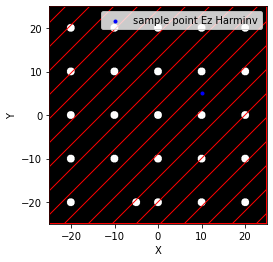

In [22]:
P["defects_position"] = [1, 0]
P["defects"] = fu.get_defects(**P)

fu.get_plot_geometry_and_harminv_sampling(**P)

There is also a helper function that you can later use in the script lattice_2D_delta_paramter.py for looping over different positions for single wire defects in a square grid. It will return a list where the first element represents the un-altered grid and the rest a triangle of positions in the lower left quadrant.

In [23]:
P["parameter_set"] = fu.get_defects_positions_type_A(**P)
display(P["parameter_set"])

[['-', '-'], [0, 0], [0, 1], [1, 1], [0, 2], [1, 2], [2, 2]]

### How to setup single-plane defects

This will shift a row of wires, not a column. The setup is similar to single-wire defects, except that the key "defects_position" now should be the index of the row of wires to be shifted. 

-----------
Initializing structure...
time for choose_chunkdivision = 0.000137091 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-20,-20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-18,-10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-10,-20,0)
          radius 1, h

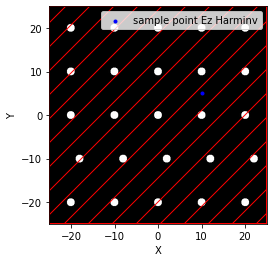

In [24]:
P["defects_type"] = "single_plane"
P["defects_axis"] = "x" # "y" or "xy"
P["defects_size"] = 0.2*P["wire_spacing_x"]

P["defects_position"] = 1
P["defects"] = fu.get_defects(**P)

fu.get_plot_geometry_and_harminv_sampling(**P)

### How to setup random defects

Specify defects type "all_random" and create an array with some random defects. Then you can either feed funcs with the defects array directly like this

-----------
Initializing structure...
time for choose_chunkdivision = 0.000138998 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-20.7379,-18.6409,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-18.1939,-10.0901,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20.6361,-2.79621,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-16.2867,7.21198,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-17.7614,19.5961,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     

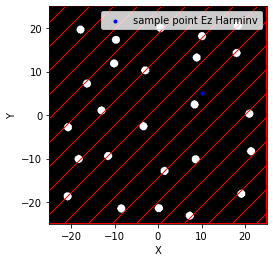

In [25]:
P["defects_type"] = "all_random"

P["defects"] = np.random.normal(loc=0, scale=0.2*P["wire_spacing_x"],
                         size=(P["wire_number_x"],P["wire_number_y"], 2))

fu.get_plot_geometry_and_harminv_sampling(**P)

or save it and later access it through `fu.get_defects(**P)`. If so, you need to modify the load path in the funcs module.

### How to setup plane misalignment

This will rotate all even or odd columns around the center of the grid. Here the key "defects_size" should be an angle in radians.

-----------
Initializing structure...
time for choose_chunkdivision = 0.000140905 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-18.3377,-21.5343,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-19.1369,-11.5663,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-19.936,-1.59829,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20.7352,8.36972,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-21.5343,18.3377,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     c

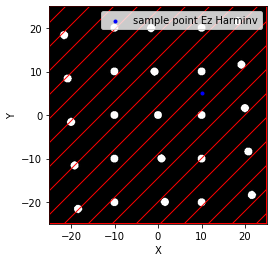

In [26]:
P["defects_type"] = "misaligned_planes"
P["misaligned_planes"] = "even"  # or "odd"
P["defects_size"] = 0.08  # Angle in radians
P["defects"] = fu.get_defects(**P)

fu.get_plot_geometry_and_harminv_sampling(**P)

Lastly, you can also combine different types of defects. For example, you can combine tilted planes with random wire displacement like this

-----------
Initializing structure...
time for choose_chunkdivision = 0.000142097 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-19.1597,-20.7617,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20.2446,-11.7169,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-19.2068,-1.40349,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20.7263,9.11071,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-21.6031,18.7703,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     

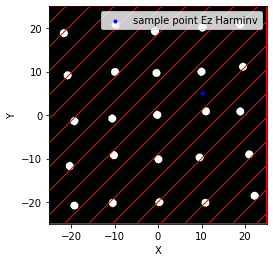

In [27]:
defects_random = np.random.normal(loc=0, scale=0.05*P["wire_spacing_x"],
                             size=(P["wire_number_x"],P["wire_number_y"], 2))

P["defects_type"] = "misaligned_planes"
P["misaligned_planes"] = "even"
P["defects_size"] = 0.05

P["defects"] = fu.get_defects(**P)+defects_random

fu.get_plot_geometry_and_harminv_sampling(**P)